<a href="https://colab.research.google.com/github/ynkim0/ComputerVision/blob/main/pymaf_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PyMAF: 3D Human Pose and Shape Regression with Pyramidal Mesh Alignment Feedback Loop**
Demo of the original PyTorch based implementation provided here: https://github.com/HongwenZhang/PyMAF

Note
Before running this notebook make sure that your runtime type is 'Python 3 with GPU acceleration'. Go to Edit > Notebook settings > Hardware Accelerator > Select "GPU".

*   ArXiv: https://arxiv.org/abs/2103.16507
*   Paper: https://arxiv.org/pdf/2103.16507.pdf
*   Repo: https://github.com/HongwenZhang/PyMAF

In [ ]:
# check if gpu is available
!nvidia-smi

Thu Oct  6 13:54:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# set up code and data for demo
!git clone https://github.com/HongwenZhang/PyMAF.git
%cd PyMAF
!wget --no-check-certificate "https://onedrive.live.com/download?cid=DF2414B28D1B6A99&resid=DF2414B28D1B6A99%21862&authkey=AJqiZVYmJa6jgoU" -O pymaf_data_for_demo.zip
!rm -rf data flashmob.mp4
!unzip pymaf_data_for_demo.zip
!rm -rf pymaf_data_for_demo.zip
!wget https://download.pytorch.org/models/resnet50-19c8e357.pth -O data/pretrained_model/resnet50-19c8e357.pth

/root
Cloning into 'PyMAF'...
remote: Enumerating objects: 411, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 411 (delta 104), reused 117 (delta 63), pack-reused 204
Receiving objects: 100% (411/411), 7.29 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (193/193), done.
/root/PyMAF
--2022-10-06 13:54:49--  https://onedrive.live.com/download?cid=DF2414B28D1B6A99&resid=DF2414B28D1B6A99%21862&authkey=AJqiZVYmJa6jgoU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ksqeka.dm.files.1drv.com/y4mOa6jBO3SCE7Ai2-VVpsB0qMIASPWZTOSSEDYx-URGpL2tq71DJGwE96csCT9YJGIqCHD5oCe99qloGylSZ-h3ZfjX6fiVqtH3INCXZq_o3huUY8ZtHRndJAdh7LgzAejwO5zkOBj2hl5twk1VJ-E-7Q9PZR0RhACKtXETSpqCMrMHYjFmOeHc15dGJJFnv3GzJTki1YIPYg4456hc5luYA/pymaf_data.zip?download&psid=1 [following]
--2022-1

In [ ]:
# PyTorch tested on version 1.9.0
!pip3 install -U torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
# pytorch3d
!pip3 install -U "git+https://github.com/facebookresearch/pytorch3d.git@stable"
# other packages
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.4 MB/s eta 0:14:05tcmalloc: large alloc 1147494400 bytes == 0x3997c000 @  0x7fca94757615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |████████████████▌               | 1055.7 MB 1.3 MB/s eta 0:12:31tcmalloc: large alloc 1434370048 bytes == 0x7dfd2000 @  0x7fca94757615 0x58e046 0x4f2e5e 0x4d19df 0x51b31c 0x5b41c5 0x58f49e 0x51b221 0x5b41c5 0x58f49e 0x51837f 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4cfabb 0x517aa0 0x4ba70a 0x538136 0x590055 0x51b180 0x5b41c5 0x58f49e 0x51837f 0x5b41c5 0x58f49e 0x51740e 0x58f2a7 0x517947 0x5b41c5 0x58f49e
     |█████

## For Video as Input

In [ ]:
# There are two sample videos. Just un-/comment to switch to each of them (use pyrender for visualization)
# video with a single person.
!CUDA_VISIBLE_DEVICES=0 python3 demo.py --checkpoint=data/pretrained_model/PyMAF_model_checkpoint.pt --vid_file ./sample_video.mp4
# video with multiple people. It takes longer time to run.
# !CUDA_VISIBLE_DEVICES=0 python3 demo.py --checkpoint=data/pretrained_model/PyMAF_model_checkpoint.pt --vid_file ./flashmob.mp4

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
Run demo for a video input.
/root/tmp/sample_video_mp4
Running "ffmpeg -i ./sample_video.mp4 -f image2 -v error /root/tmp/sample_video_mp4/%06d.png"
Images saved to "/root/tmp/sample_video_mp4"
Input video number of frames 300
Running Multi-Person-Tracker
100% 25/25 [00:18<00:00,  1.38it/s]
Finished. Detection + Tracking FPS 16.57
INFO:models.pose_resnet:=> loading pretrained model data/pretrained_model/resnet50-19c8e357.pth
INFO:models.pose_resnet:loaded ResNet imagenet pretrained model
Loaded pretrained weights from "data/pretrained_model/PyMAF_model_checkpoint.pt"
Running reconstruction on each tracklet...
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, 

In [ ]:
# Play the generated video
from IPython.display import HTML
from base64 import b64encode

def video(path):
  mp4 = open(path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML('<video width=500 controls loop> <source src="%s" type="video/mp4"></video>' % data_url)

video('output/sample_video/sample_video_result.mp4')
# video('output/flashmob/flashmob_result.mp4')

## For Image as Input

In [ ]:
!python3 demo.py --checkpoint=data/pretrained_model/PyMAF_model_checkpoint.pt --img_file examples/COCO_val2014_000000019667.jpg

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
Run demo for a single input image.
INFO:models.pose_resnet:=> loading pretrained model data/pretrained_model/resnet50-19c8e357.pth
INFO:models.pose_resnet:loaded ResNet imagenet pretrained model
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Saved the result image to output/examples.


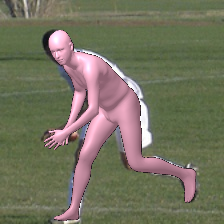

In [ ]:
# Display the generated image
from IPython.display import Image
Image(filename='output/examples/COCO_val2014_000000019667_smpl.png')

Here we express our sincere gratitude towards the original authors for their awesome, elegant codebase [VIBE](https://github.com/mkocabas/VIBE). 

Making it open-sourced is admirable and truly appreciated.